  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


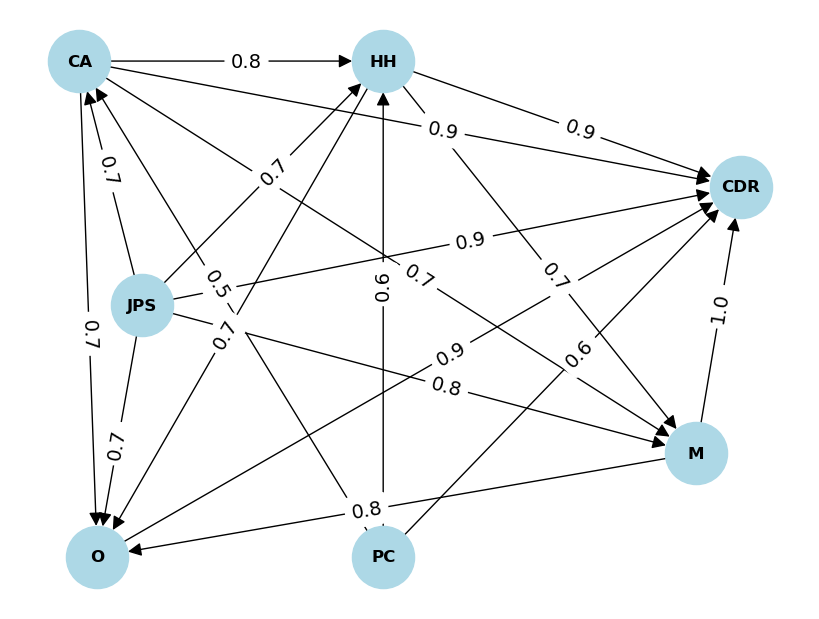

In [8]:
import pandas as pd
from pgmpy.estimators import PC
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Step 1: Load your dataset
file_path = r'./content/adni compressed.zip'
df = pd.read_csv(file_path)
df = df.iloc[:, 14:21]

# Step 2: Initialize PC object with your data
pc = PC(data=df)

# Estimate skeleton, PDAG, and DAG
dag = pc.estimate(return_type="dag")

# Step 3: Plot the graph
def plot_graph_with_fixed_position(graph, title, pos):
    plt.figure(figsize=(10, 8))
    nx.draw(graph, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
    plt.title(title)
    plt.show()

# Check for cycles in the DAG
def has_cycles(graph):
    try:
        cycles = list(nx.find_cycle(graph, orientation='original'))
        return True, cycles
    except nx.exception.NetworkXNoCycle:
        return False, None

# Convert DAG to NetworkX graph
graph = nx.DiGraph(dag.edges())

# Check if the graph has cycles
has_cycle, cycles = has_cycles(graph)
if has_cycle:
    print("Cycles detected in the graph:", cycles)
    for cycle in cycles:
        u, v, _ = cycle
        graph.remove_edge(u, v)

# Step 4: Calculate chi-square statistic and assign strengths to edges
def calculate_chisquare_strengths(df, model):
    strengths = {}
    for edge in model.edges():
        var1, var2 = edge
        contingency_table = pd.crosstab(df[var1], df[var2])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        strengths[edge] = chi2
    return strengths

strengths = calculate_chisquare_strengths(df, dag)

# Normalize the strengths and round off to the first decimal
max_strength = max(strengths.values())
normalized_strengths = {edge: round(strength / max_strength, 1) for edge, strength in strengths.items()}

# Step 5: Convert the DAG to a DiGraph and add weights
graph = nx.DiGraph(dag.edges())
nx.set_edge_attributes(graph, normalized_strengths, 'weight')

# Step 6: Plot the DAG with weighted edges and custom labels
def plot_weighted_graph_with_fixed_labels(graph, title, pos, custom_labels, label_pos=0.6):
    plt.figure(figsize=(8, 6))
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw(graph, pos, labels=custom_labels, with_labels=True, node_size=2000, node_color='lightblue', font_size=12, font_weight='bold', arrowsize=20)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, label_pos=label_pos,font_size=14)
    plt.title(title)
    plt.show()

# Define custom labels for the nodes
custom_labels = {
    'CDCOMMUN': 'CA',
    'CDJUDGE': 'JPS',
    'CDORIENT': 'O',
    'CDHOME': 'HH',
    'CDMEMORY': 'M',
    'CDCARE': 'PC',
    'CDGLOBAL': 'CDR'
}

# Define positions for nodes with fixed coordinates
pos = {
    'CDCOMMUN': [0.16, 0.83],
    'CDJUDGE': [0.23, 0.5],
    'CDORIENT': [0.18, 0.16],
    'CDHOME': [0.5, 0.83],
    'CDMEMORY': [0.85, 0.3],
    'CDCARE': [0.5, 0.16],
    'CDGLOBAL': [0.90, 0.66]
}

# Plot the weighted graph with fixed positions and custom labels
plot_weighted_graph_with_fixed_labels(graph, "", pos, custom_labels, label_pos=0.45)

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


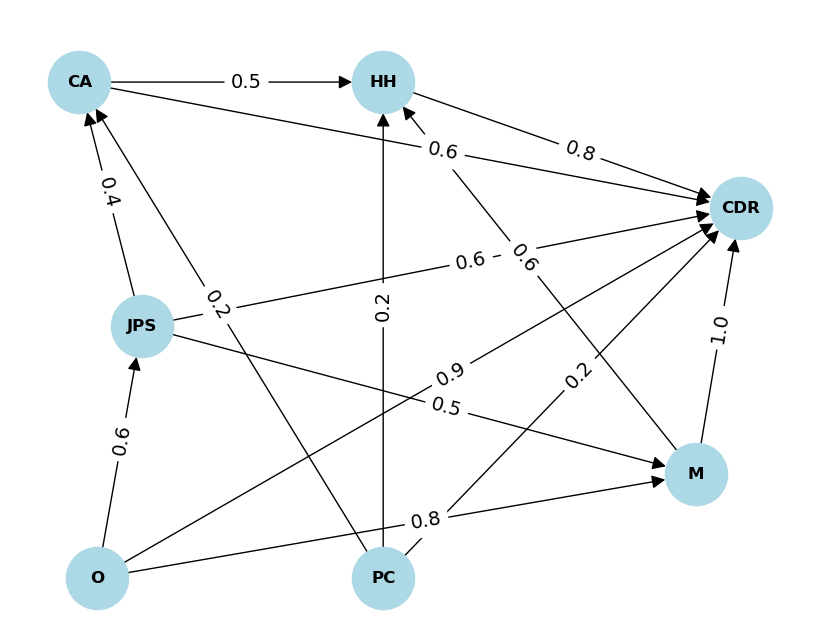

In [2]:
# @title LASI STATA
import pandas as pd
from pgmpy.estimators import PC
from pgmpy.models import BayesianNetwork
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Step 1: Load your dataset
file_path = r'./content/LASI1.zip'  # Ensure this is the correct path to your dataset
df = pd.read_csv(file_path)

# Extract the specified columns
columns_of_interest = [
    'r1cdr_com1', 'r1cdr_jud1', 'r1cdr_mem1',
    'r1cdr_per1', 'r1cdr_ori1', 'r1cdr_hom1', 'r1cdr_scor1'
]
df2 = df[columns_of_interest]

# Step 2: Initialize PC object with your data
pc = PC(data=df2)

# Estimate skeleton, PDAG, and DAG
dag = pc.estimate(return_type="dag")

# Step 3: Plot the graph
def plot_graph_with_fixed_position(graph, title, pos, labels):
    plt.figure(figsize=(10, 8))
    nx.draw(graph, pos, with_labels=True, labels=labels, node_size=1000, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
    plt.title(title)
    plt.show()

# Check for cycles in the DAG
def has_cycles(graph):
    try:
        cycles = list(nx.find_cycle(graph, orientation='original'))
        return True, cycles
    except nx.exception.NetworkXNoCycle:
        return False, None

# Convert DAG to NetworkX graph
graph = nx.DiGraph(dag.edges())


# Check if the graph has cycles
has_cycle, cycles = has_cycles(graph)
if has_cycle:
    print("Cycles detected in the graph:", cycles)

    for cycle in cycles:
        u, v, _ = cycle
        graph.remove_edge(u, v)

# Step 4: Calculate chi-square statistic and assign strengths to edges
def calculate_chisquare_strengths(df, model):
    strengths = {}
    for edge in model.edges():
        var1, var2 = edge
        contingency_table = pd.crosstab(df[var1], df[var2])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        strengths[edge] = chi2
    return strengths

strengths = calculate_chisquare_strengths(df2, graph)

# Normalize the strengths and round off to the first decimal
max_strength = max(strengths.values())
normalized_strengths = {edge: round(strength / max_strength, 1) for edge, strength in strengths.items()}

# Step 5: Convert the DAG to a DiGraph and add weights
# graph = nx.DiGraph(dag.edges())
nx.set_edge_attributes(graph, normalized_strengths, 'weight')

# Define positions for nodes with fixed coordinates
pos = {
    'r1cdr_com1': [0.16, 0.83],
    'r1cdr_jud1': [0.23, 0.5],
    'r1cdr_mem1': [0.85, 0.3],
    'r1cdr_per1': [0.5, 0.16],
    'r1cdr_ori1': [0.18, 0.16],
    'r1cdr_hom1': [0.5, 0.83],
    'r1cdr_scor1': [0.9, 0.66]
}

# Create a mapping of the original node names to the new labels
labels = {
    'r1cdr_com1': 'CA',
    'r1cdr_jud1': 'JPS',
    'r1cdr_mem1': 'M',
    'r1cdr_per1': 'PC',
    'r1cdr_ori1': 'O',
    'r1cdr_hom1': 'HH',
    'r1cdr_scor1': 'CDR'
}

# Step 6: Plot the DAG with weighted edges
def plot_weighted_graph_with_fixed_position(graph, title, pos, labels):
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, with_labels=True, labels=labels, node_size=2000, node_color='lightblue', font_size=12, font_weight='bold', arrowsize=20)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels,font_size=14, label_pos=0.45)
    plt.title(title)
    plt.show()

plot_weighted_graph_with_fixed_position(graph, " ", pos, labels)
